In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the file name
file_name = list(uploaded.keys())[0]

Saving LoanApprovalPrediction - LoanApprovalPrediction.csv to LoanApprovalPrediction - LoanApprovalPrediction.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
#Importing the data frame
data = pd.read_csv("LoanApprovalPrediction - LoanApprovalPrediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [ ]:
#Lets check on the missing values
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [ ]:
#Check on duplicates
data.duplicated().sum()

0

#Features in the data set

1. Loan ID | A unique ID

2. Gender  |

3. Married

4. Dependents

5. Education

6. Self_Employed

7. ApplicantIncome

8. Coapplicant Income

9. Loan Amount

10. Loan Amount Term

11. Credit History

12. Property Area

13. Loan Status

##Data Preprocessing and Visualization

In [ ]:
#Get the number of columns with the object data type
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


**As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.**



In [ ]:
#Let us drop the loan id column
data.drop('Loan_ID', axis=1, inplace=True)

**Visualize the unique values in columns using a barplot. This will simply shoe which value is dominating as per our dataset**




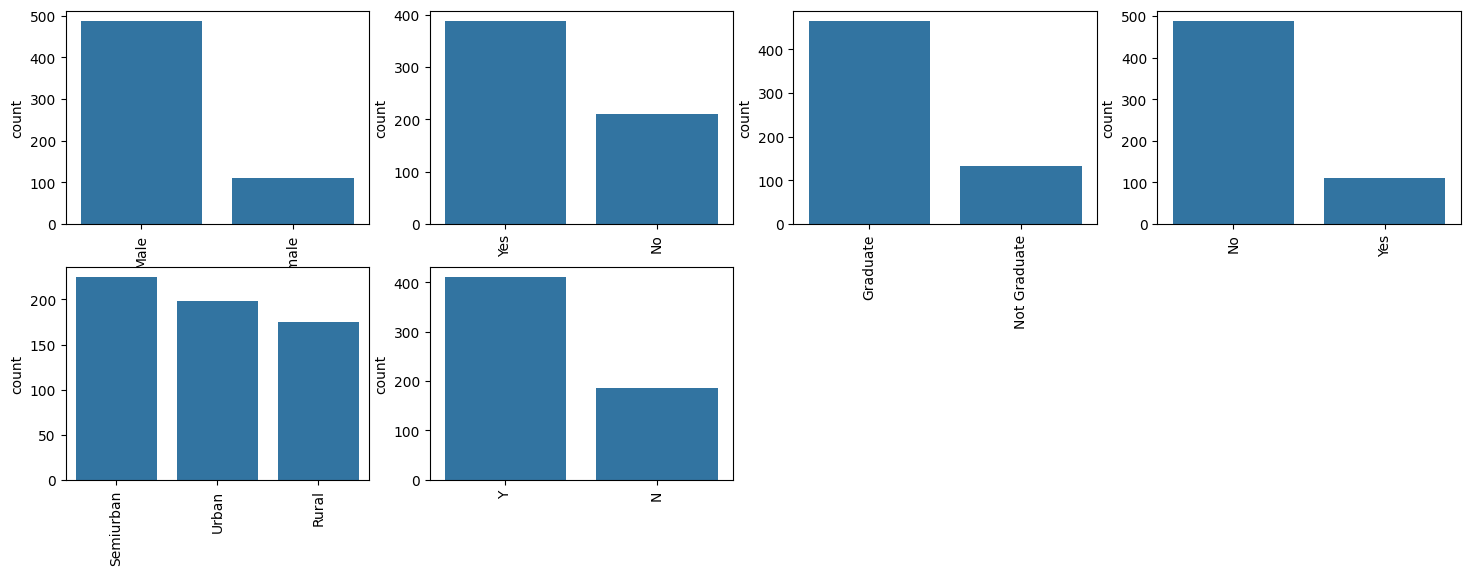

In [ ]:
#Visualize the unique values in columns using a barplot. This will simply shoe which value is dominating as per our dataset,
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index += 1
plt.show()


**As the categorical variable  values are binary, we will use label encoder for all such columns and the values will change into int data type**

In [ ]:
#Import label encoder
from sklearn import preprocessing
#lebal encoder just knows how understand word labels
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
for col in object_cols:
  data[col] = label_encoder.fit_transform(data[col])


In [ ]:
#to fimd the columns with the datatype == object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


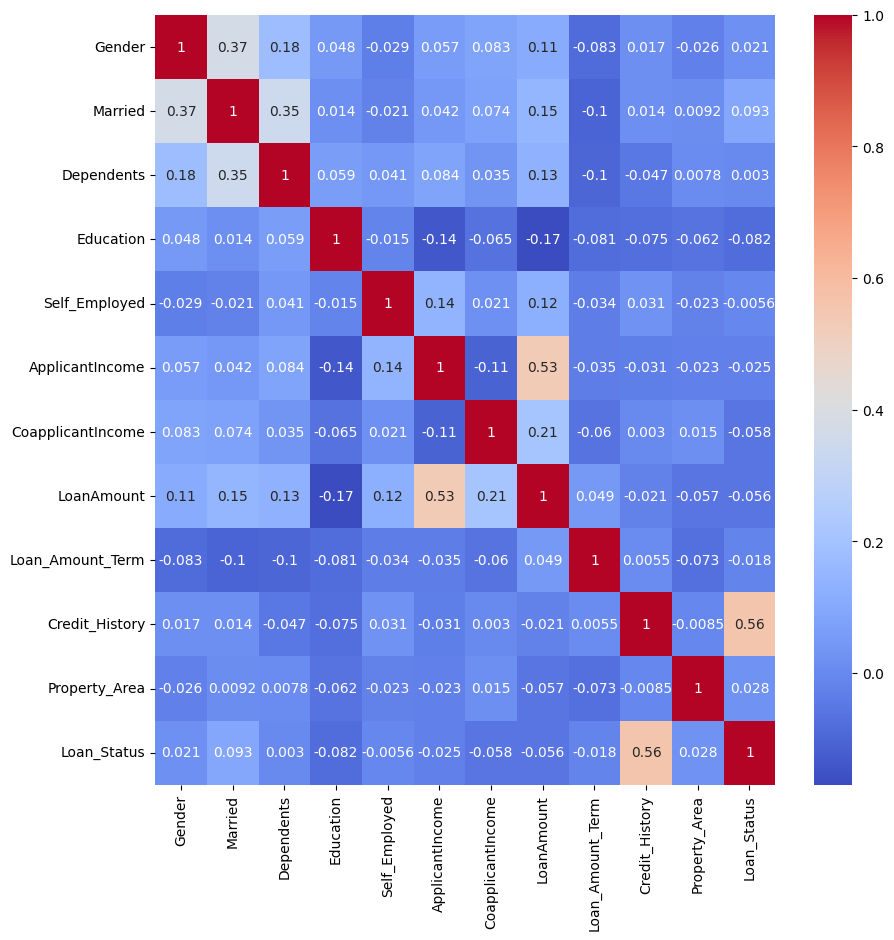

In [ ]:
#Let us have a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

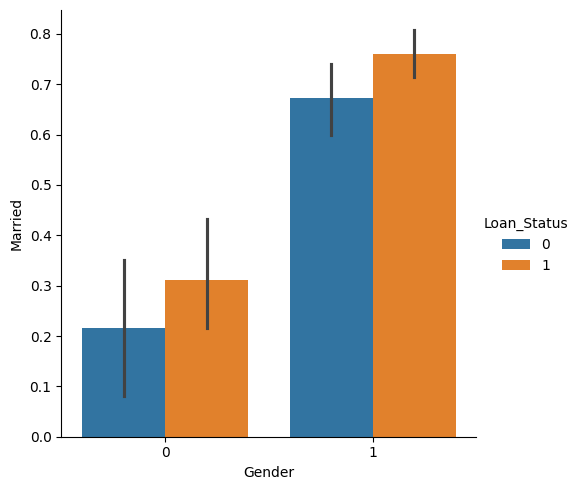

In [ ]:
#Let us use a catplot to visualize the plot for the gender and the marital status of the applicant
sns.catplot(x='Gender', y='Married', data=data, kind='bar', hue='Loan_Status')
plt.show()

**Now we will find out if there is any missing values in the dataset using below code.**



In [ ]:
#Now we will find out if there is any missing values in the dataset using below code.
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())
data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


#Spilitting the dataset

In [ ]:
#Splitting the dataset

from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

##Model Training and Evaluation

This is a classification model, so we will use the following models:

KNeighborsClassifiers

Random Forest

Support vector classifiers

Logistics regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(n_estimators=7,
                            criterion = 'entropy',
                            random_state=7)
svc = SVC()
lr = LogisticRegression()

#Making predictions on the training set
for clf in (knn, rf, svc, lr):
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_train)
  print(clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_train, Y_pred))

KNeighborsClassifier = 78.49162011173185
RandomForestClassifier = 98.04469273743017
SVC = 68.71508379888269
LogisticRegression = 80.44692737430168


In [ ]:
#Prediction on the test data
for clf in (knn, rf, svc, lr):
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_test, Y_pred))


KNeighborsClassifier = 63.74999999999999
RandomForestClassifier = 82.5
SVC = 69.16666666666667
LogisticRegression = 80.83333333333333


Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used